<a href="https://colab.research.google.com/github/drshahizan/Python_EDA/blob/main/assignment/ass3/bdm/Truth%20Archive/readme.md/ass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Introduction**

Exploratory Data Analysis on NYC Taxi data. The data set contains the data regarding several taxi trips and its duration in New York City.
We strive to perform fundamental statistical analysis and conduct basic data visualization to enhance our comprehension of the data. Additionally, we will delve into the dataset's organization, discern any discernible patterns, trends, or anomalies, and closely examine the distributions and relationships of variables to uncover potential insights.

Import Data from Kaggle using Kaggle API

In [2]:
! pip install kaggle
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d elemento/nyc-yellow-taxi-trip-data

 99% 1.77G/1.78G [00:17<00:00, 141MB/s]
100% 1.78G/1.78G [00:17<00:00, 109MB/s]


In [4]:
!unzip nyc-yellow-taxi-trip-data.zip

Archive:  nyc-yellow-taxi-trip-data.zip
  inflating: yellow_tripdata_2015-01.csv  
  inflating: yellow_tripdata_2016-01.csv  
  inflating: yellow_tripdata_2016-02.csv  
  inflating: yellow_tripdata_2016-03.csv  


# **Libraries**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()


Import the Data

In [6]:
df = pd.read_csv("/content/yellow_tripdata_2015-01.csv")


Explore the Data


In [ ]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [ ]:
class DfOverview:
    """
        Give an overview for a given data frame,
        like null persentage for each columns,
        unique value percentage for each columns and more
    """

    def __init__(self, df: pd.DataFrame) -> None:
        self.df = df

    def missing_value(self) -> None:
        nullSum = self.df.isna().sum()
        return [col for col in nullSum]

    def percentage(self, list):
        return [str(round(((value / self.df.shape[0]) * 100), 2)) + '%' for value in list]

    def getOverview(self) -> None:

        _columns = [column for column in self.df]
        _count = self.df.count().values
        _unique = [self.df[column].value_counts().shape[0] for column in self.df]
        _missing_values = self.missing_value()

        columns = [
            'Column',
            'count',
            'missing_value_count',
            'Missing_value_percentage',
            'unique_value_count',
            'unique_value_percentage',
            'dtype']
        data = zip(
            _columns,
            _count,
            _missing_values,
            self.percentage(_missing_values),
            _unique,
            self.percentage(_unique),
            self.df.dtypes
        )
        new_df = pd.DataFrame(data=data, columns=columns)
        return new_df

In [ ]:
def show_cols_mixed_dtypes(df):
    mixed_dtypes = {'Column': [], 'Data type': []}
    for col in df.columns:
        dtype = pd.api.types.infer_dtype(df[col])
        if dtype.startswith("mixed"):
            mixed_dtypes['Column'].append(col)
            mixed_dtypes['Data type'].append(dtype)
    if len(mixed_dtypes['Column']) == 0:
        print('None of the columns contain mixed types.')
    else:
        print(pd.DataFrame(mixed_dtypes))

# **General Statistics**




In [ ]:
df.size

242230734

In [ ]:
df.shape

(12748986, 19)

This dataset contains 12748986 rows and 19 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12748986 entries, 0 to 12748985
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RateCodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.8+ GB


In [ ]:
df_overview = DfOverview(df)
df_overview.getOverview().transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Column,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,12748986,12748986,12748986,12748986,12748986,12748986,12748986,12748986,12748986,12748986,12748986,12748986,12748986,12748986,12748986,12748986,12748986,12748983,12748986
missing_value_count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
Missing_value_percentage,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%
unique_value_count,2,2438284,2442163,10,4350,35900,62748,7,2,53297,87523,5,2053,55,3,3596,932,2,11969
unique_value_percentage,0.0%,19.13%,19.16%,0.0%,0.03%,0.28%,0.49%,0.0%,0.0%,0.42%,0.69%,0.0%,0.02%,0.0%,0.0%,0.03%,0.01%,0.0%,0.09%
dtype,int64,object,object,int64,float64,float64,float64,int64,object,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64


There isnt any null values found in any columns except in improvement_surcharge. Only 3 null values in that column thus we decided to ignore it as it does'nt affect our EDA

In [ ]:
show_cols_mixed_dtypes(df)

None of the columns contain mixed types.


In [ ]:
def drop_duplicates(df):
    old = df.shape[0]
    df.drop_duplicates(inplace=True)
    new = df.shape[0]
    count = old - new
    if (count == 0):
        print("No duplicate rows were found.")
    else:
        print(f"{count} duplicate rows were found and removed.")

def plot_dist(df:pd.DataFrame, column:str, color:str='cornflowerblue')->None:
    sns.displot(data=df, x=column, color=color,  kde=False, height=6, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plotly_plot_bar(df, x, y, title=None, width=800, color=['cornflowerblue']):
    if title == None:
        title=f'Distribution of {x}'
    fig = px.bar(df, x=x, y=y, title=title)
    return Image(pio.to_image(fig, format='png', width=width))

def plotly_plot_pie(df, column, title=None, width=800, limit=None):
    a = pd.DataFrame({'count': df.groupby([column]).size()}).reset_index()
    a = a.sort_values("count", ascending=False)
    if limit:
        a.loc[a['count'] < limit, column] = f'Other {column}s'
    if title == None:
        title=f'Distribution of {column}'
    fig = px.pie(a, values='count', names=column, title=title)
    return Image(pio.to_image(fig, format='png', width=width))

In [ ]:
drop_duplicates(df)

383 duplicate rows were found and removed.


In [ ]:
print(df['VendorID'].nunique())
print(df['tpep_pickup_datetime'].nunique())
print(df['tpep_dropoff_datetime'].nunique())
print(df['passenger_count'].nunique())
print(df['trip_distance'].nunique())
print(df['pickup_longitude'].nunique())
print(df['pickup_latitude'].nunique())
print(df['RateCodeID'].nunique())
print(df['store_and_fwd_flag'].nunique())
print(df['dropoff_longitude'].nunique())
print(df['dropoff_latitude'].nunique())
print(df['payment_type'].nunique())
print(df['fare_amount'].nunique())
print(df['extra'].nunique())
print(df['mta_tax'].nunique())
print(df['tip_amount'].nunique())
print(df['tolls_amount'].nunique())
print(df['improvement_surcharge'].nunique())
print(df['total_amount'].nunique())

2
2438284
2442163
10
4350
35900
62748
7
2
53297
87523
5
2053
55
3
3596
932
2
11969


# **Univariate Analysis**

1. VendorID

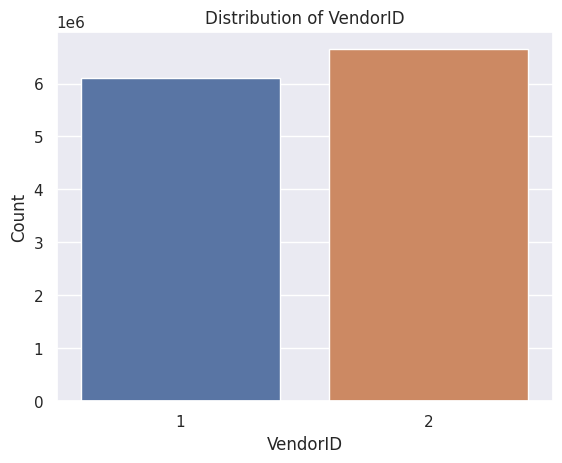

In [ ]:
sns.countplot(x='VendorID', data=df)
plt.xlabel('VendorID')
plt.ylabel('Count')
plt.title('Distribution of VendorID')
plt.show()

We've observed that there are only two vendors (Vendor 1 and Vendor 2). Both vendors have nearly equal trip shares, with a minimal difference between them. However, Vendor 2 is noticeably more renowned among the population, as indicated by the graphs provided.

2. Passengers

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df.passenger_count.value_counts()

1    8993507
2    1814574
5     697645
3     528486
6     454568
4     253228
0       6565
9         11
8         10
7          9
Name: passenger_count, dtype: int64

Here we see that the mostly 1 to 6 passengers avail the cab. The instance of large group of people travelling together is rare.

<ipython-input-28-a5d4debf96bd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['passenger_count'],kde=False)


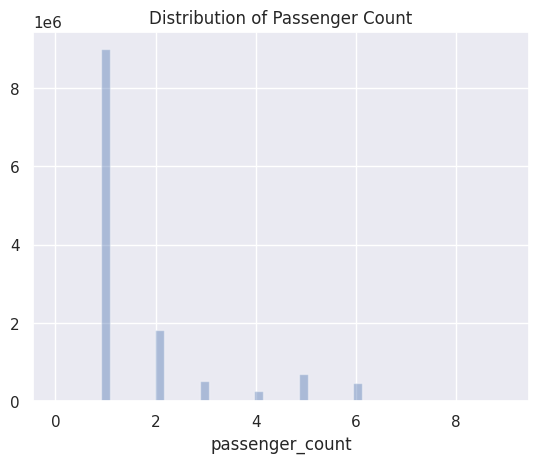

In [ ]:
sns.distplot(df['passenger_count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()

The instance of large group of people travelling together is rare.

2. Duration of the travel

In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration_seconds'] = df['duration'].dt.total_seconds()
print(df[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'duration']])

         tpep_pickup_datetime tpep_dropoff_datetime        duration
0         2015-01-15 19:05:39   2015-01-15 19:23:42 0 days 00:18:03
1         2015-01-10 20:33:38   2015-01-10 20:53:28 0 days 00:19:50
2         2015-01-10 20:33:38   2015-01-10 20:43:41 0 days 00:10:03
3         2015-01-10 20:33:39   2015-01-10 20:35:31 0 days 00:01:52
4         2015-01-10 20:33:39   2015-01-10 20:52:58 0 days 00:19:19
...                       ...                   ...             ...
12748981  2015-01-10 19:01:44   2015-01-10 19:05:40 0 days 00:03:56
12748982  2015-01-10 19:01:44   2015-01-10 19:07:26 0 days 00:05:42
12748983  2015-01-10 19:01:44   2015-01-10 19:15:01 0 days 00:13:17
12748984  2015-01-10 19:01:44   2015-01-10 19:17:03 0 days 00:15:19
12748985  2015-01-10 19:01:45   2015-01-10 19:07:33 0 days 00:05:48

[12748986 rows x 3 columns]


Here, we change the pick up and drop off hours in datetime to calculate the duration of trip in seconds.

<ipython-input-13-b5b5cc64f669>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['duration'],kde=False)


Text(0.5, 1.0, 'The distribution of of the Pick Up  Duration distribution')

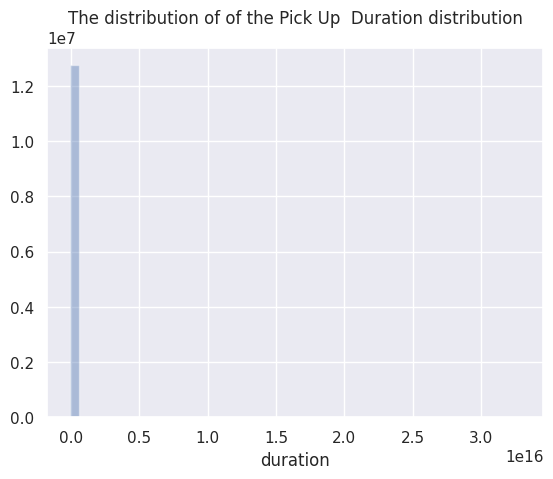

In [ ]:
sns.distplot(df['duration'],kde=False)
plt.title('The distribution of of the Pick Up  Duration distribution')

This histogram shows extreme right skewness, hence there are outliers. Lets see the boxplot of this variable.

Text(0.5, 1.0, 'A boxplot depicting the pickup duration distribution')

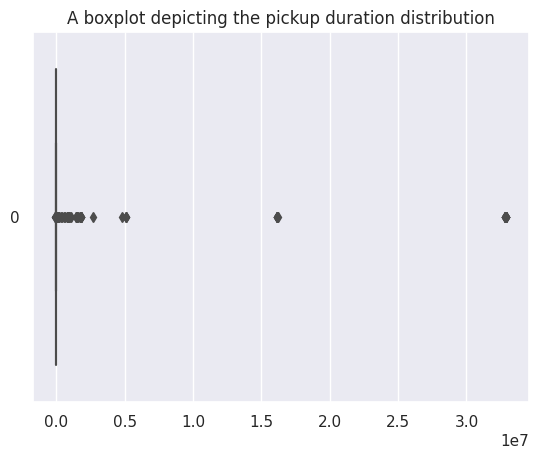

In [ ]:
sns.boxplot(df['duration_seconds'], orient='horizontal')
plt.title('A boxplot depicting the pickup duration distribution')

Thus we see there is only value near 2000000 while all the others are somewhere between 0 and 100000. The one near 2000000 is definitely an outlier which must be treated.

In [ ]:

print( df['duration_seconds'].nlargest(10))


2526363     32913338.0
2526362     32911853.0
2479740     32909576.0
2479739     32909274.0
2479738     32909001.0
2479737     32908258.0
2479736     32906498.0
2479735     32905773.0
2479734     32904619.0
12395109    32836502.0
Name: duration_seconds, dtype: float64


In [ ]:
df.duration_seconds.groupby(pd.cut(df.duration_seconds, np.arange(1,max(df.duration_seconds),3600))).count()

duration_seconds
(1.0, 3601.0]               12684512
(3601.0, 7201.0]               36666
(7201.0, 10801.0]               1047
(10801.0, 14401.0]               350
(14401.0, 18001.0]               151
                              ...   
(32893201.0, 32896801.0]           0
(32896801.0, 32900401.0]           0
(32900401.0, 32904001.0]           0
(32904001.0, 32907601.0]           3
(32907601.0, 32911201.0]           4
Name: duration_seconds, Length: 9142, dtype: int64

These trips ran for more than 20 days, which seems unlikely by the distance travelled.


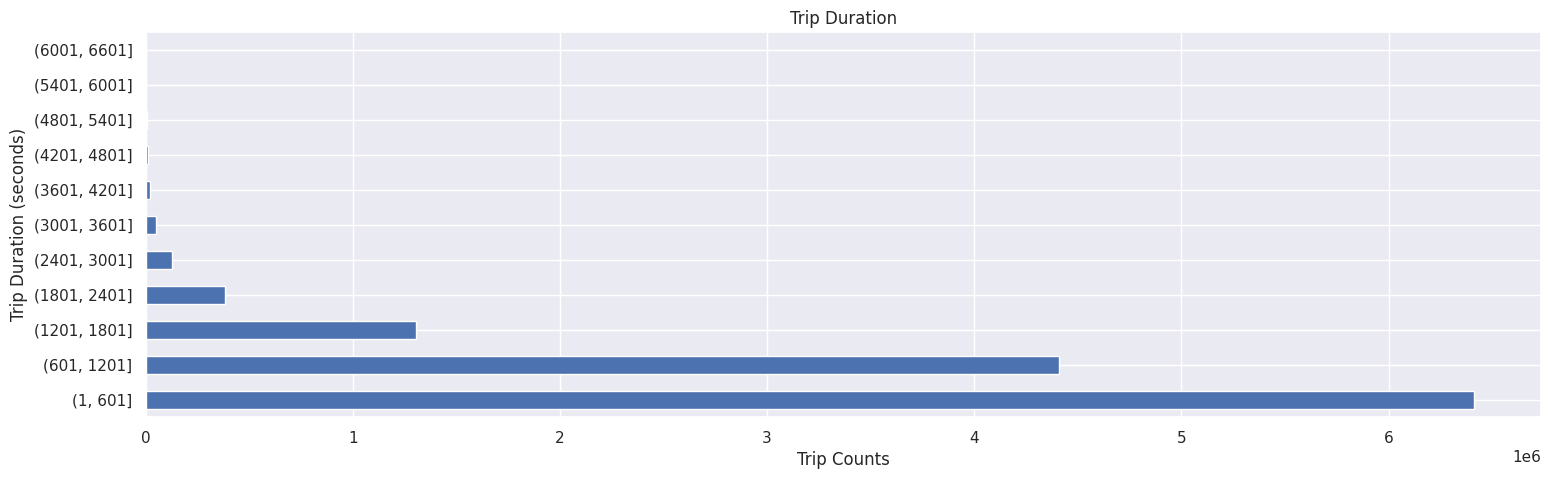

In [ ]:
df.duration_seconds.groupby(pd.cut(df.duration_seconds, np.arange(1,7200,600))).count().plot(kind='barh',figsize = (18,5))
plt.title('Trip Duration')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (seconds)')
plt.show()

We can observe that most of the trips took 0 - 30 mins to complete

3. The distribution of Pickup and Drop Off day of the week

In [ ]:
df['pickup_day']=df['tpep_pickup_datetime'].dt.day_name()
df['dropoff_day']=df['tpep_dropoff_datetime'].dt.day_name()

In [ ]:
df['pickup_day'].value_counts()

Saturday     2379707
Friday       2227157
Thursday     2168213
Wednesday    1683789
Sunday       1583098
Tuesday      1373922
Monday       1332717
Name: pickup_day, dtype: int64

In [ ]:
df['dropoff_day'].value_counts()

Saturday     2378985
Friday       2216789
Thursday     2160689
Wednesday    1681098
Sunday       1604381
Tuesday      1371308
Monday       1335353
Name: dropoff_day, dtype: int64

Most trips were taken on Saturday

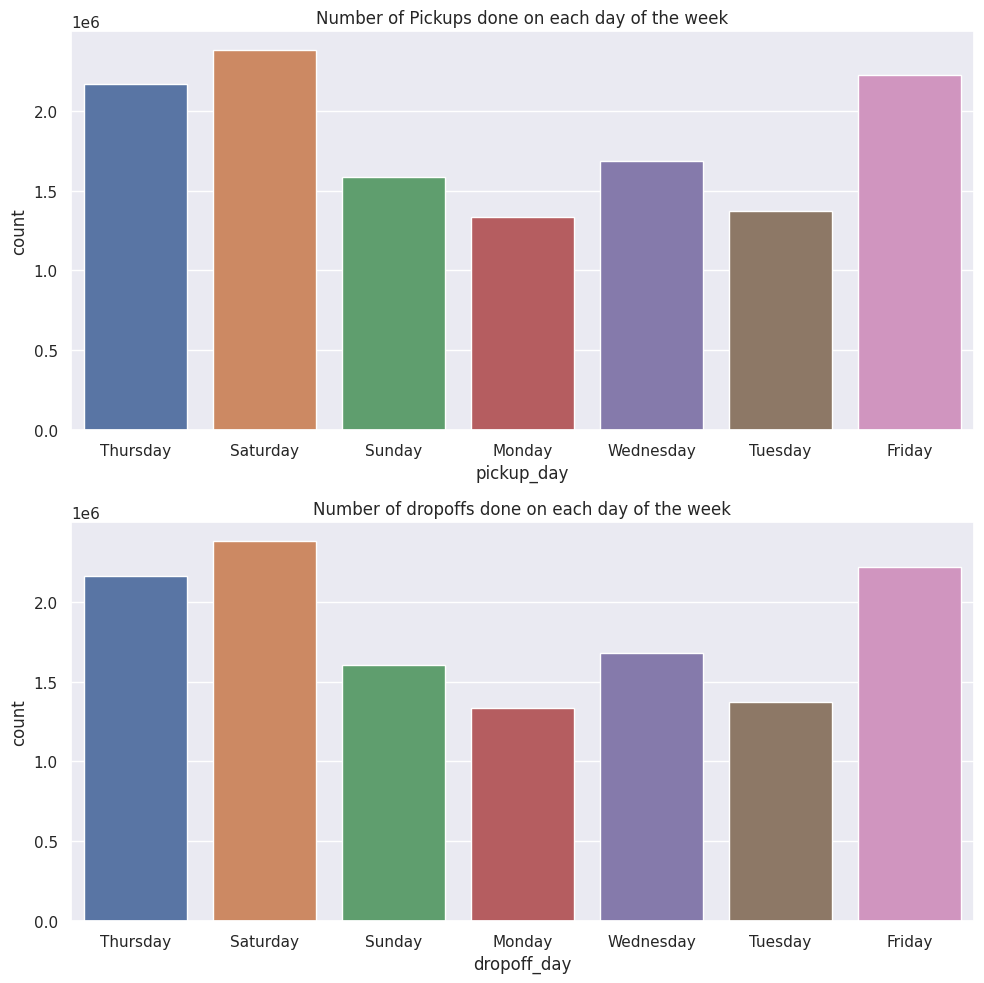

In [ ]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

Most trips were taken on Saturday and the least amount of trips were taken on Monday

4. The distribution of Pickup and Drop Off hours of the day

In [ ]:
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(11, 0, 0):
        return 'morning'
    elif x>=datetime.time(11, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'

df['pickup_timezone']=df['tpep_pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_timezone']=df['tpep_dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

Since it is difficult to analyze the time component when it is represented in hours, minutes, and seconds, we split the times into four time zones: morning (4 hours to 11 hours), midday (10 hours to 16 hours), evening (16 hours to 22 hours), and late night (22 hours to 4 hours).

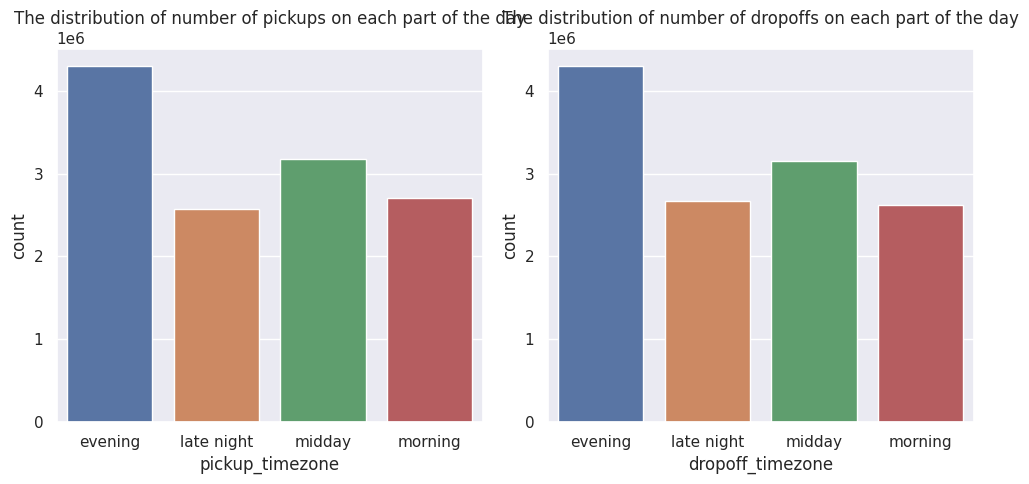

In [ ]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(x='pickup_timezone',data=df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.tight_layout()

Thus, we see that evenings are when most pickups and drops happen. whereas the morning and late night hours see the fewest drops and pickups.


Text(0.5, 1.0, 'Distribution of dropoff hours')

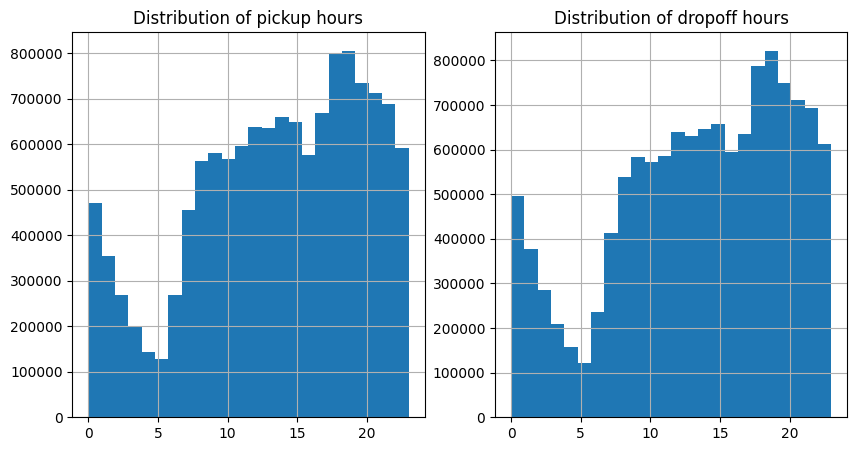

In [ ]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
df['pickup_hour']=df['tpep_pickup_datetime'].dt.hour
df.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')
df['dropoff_hour']=df['tpep_dropoff_datetime'].dt.hour
df.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')

The two distributions are nearly identical and match the previously completed distribution of the day's hours, which were divided into four sections.


5. Distribution of the stored and forward flag



In [ ]:
df['store_and_fwd_flag'].value_counts()

N    12633570
Y      115033
Name: store_and_fwd_flag, dtype: int64

There are significantly more N flags. Later on, we can determine whether they are related to the trip's duration in any way.


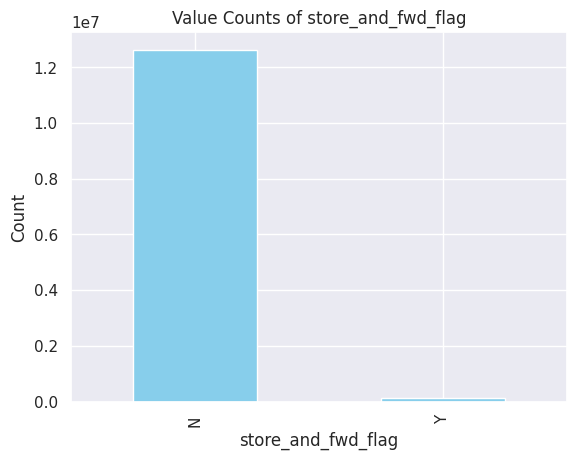

In [ ]:
# Plotting the value counts

df['store_and_fwd_flag'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Value Counts of store_and_fwd_flag')
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Count')
plt.show()


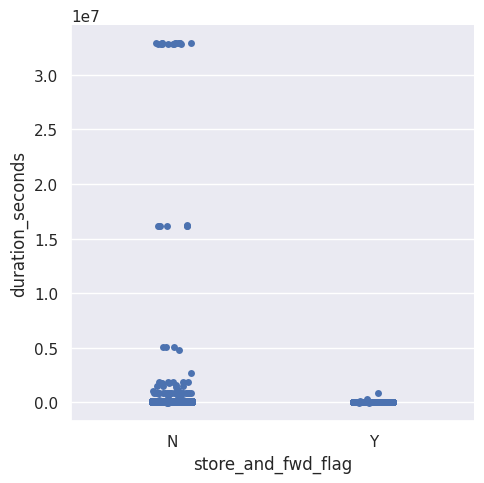

In [ ]:
sns.catplot(x="store_and_fwd_flag", y="duration_seconds",kind="strip",data=df)

Thus we see the flag was stored only for short duration trips and for long duration trips the flag was never stored.

6. Distribution of Longitude and Latitude

<ipython-input-26-33214a320c3f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['dropoff_longitude'])


Text(0.5, 1.0, 'The distribution of Drop off Longitude')

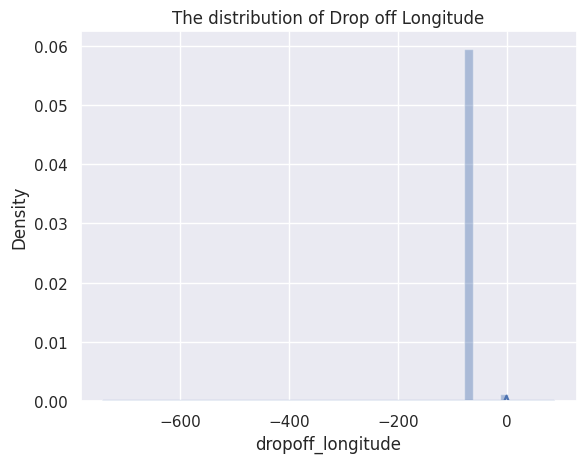

In [ ]:
sns.distplot(df['dropoff_longitude'])
plt.title('The distribution of Drop off Longitude')

<ipython-input-27-6cdf7dc0ad5f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pickup_longitude'])


Text(0.5, 1.0, 'The distribution of Pick up Longitude')

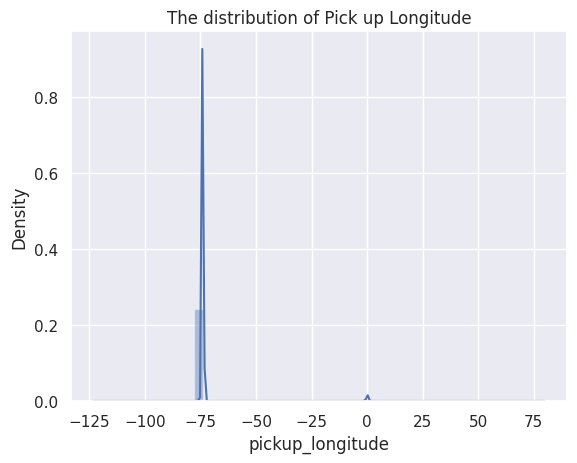

In [ ]:
sns.distplot(df['pickup_longitude'])
plt.title('The distribution of Pick up Longitude')

<ipython-input-15-7d9851bce4a5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['dropoff_latitude'])


Text(0.5, 1.0, 'The distribution of drop off Latitude')

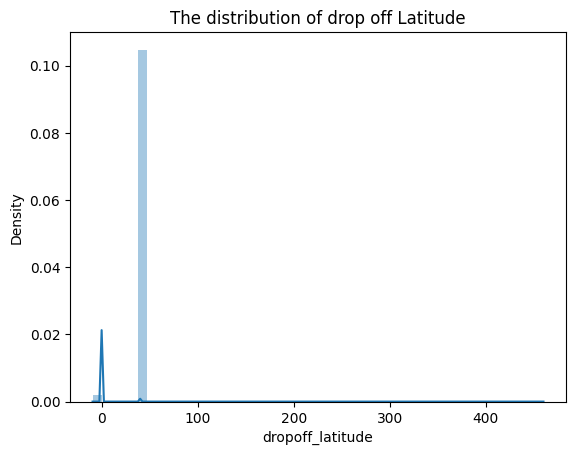

In [ ]:
sns.distplot(df['dropoff_latitude'])
plt.title('The distribution of drop off Latitude')

<ipython-input-16-0c9c08505afb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pickup_latitude'])


Text(0.5, 1.0, 'The distribution of pick up Latitude')

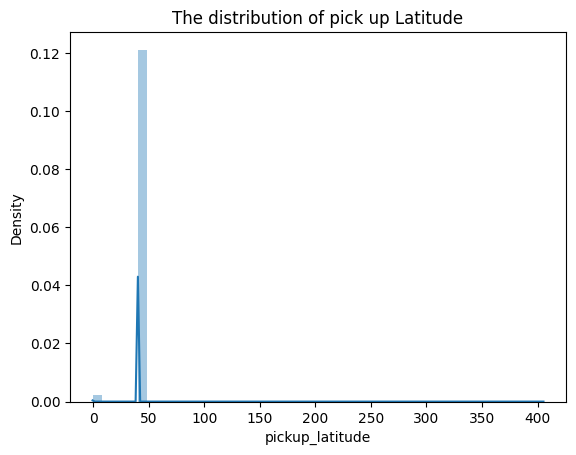

In [ ]:
sns.distplot(df['pickup_latitude'])
plt.title('The distribution of pick up Latitude')



It is evident that while the pickup and dropoff latitudes have somewhat different distributions, the pickup and dropoff longitudes have nearly identical distributions.


Payment Types

[1 2 3 4 5]


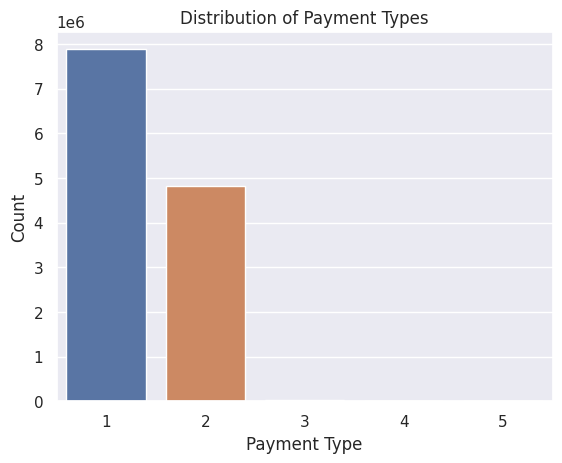

In [ ]:
print(df['payment_type'].unique())
sns.countplot(x='payment_type', data=df)
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Distribution of Payment Types')
plt.show()


The payment types are mostly 1 and 2. 1 represents cash money and 2 for online payment. Its evident that most customers prefer cash pay.

Total amount

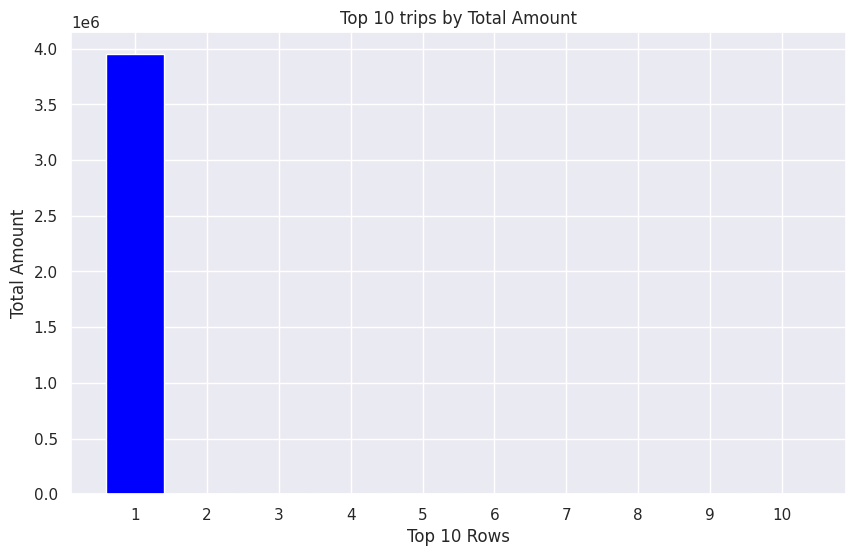

In [20]:
sorted_df = df.sort_values(by='total_amount', ascending=False)
top_10 = sorted_df.head(10)
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), top_10['total_amount'], color='blue')
plt.xlabel('Top 10 Rows')
plt.ylabel('Total Amount')
plt.title('Top 10 trips by Total Amount')
plt.xticks(range(1, 11))
plt.show()

Here, we see that the top most payment seems unusual there we need to remove that one particular row for a better distribution.

In [21]:
index_to_remove = 10862961
df.drop(index_to_remove, inplace=True)

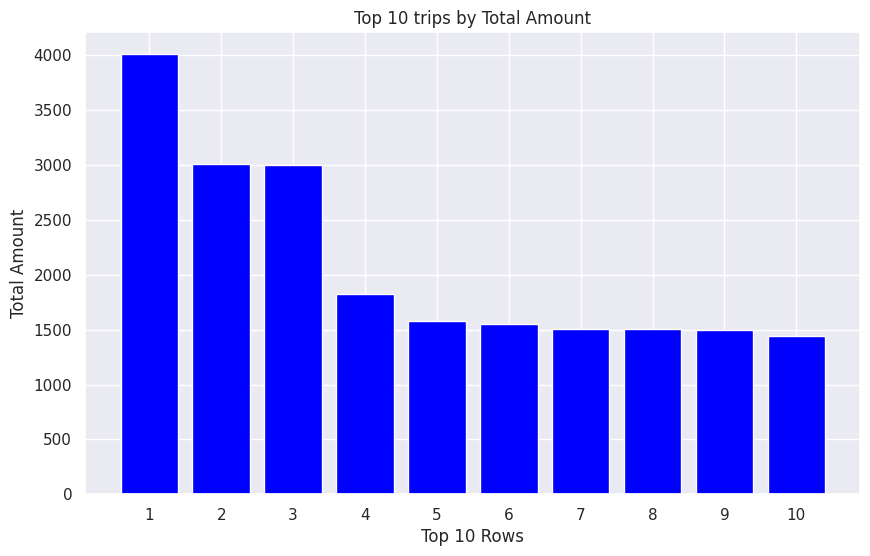

In [22]:
sorted_df = df.sort_values(by='total_amount', ascending=False)
top_10 = sorted_df.head(10)
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), top_10['total_amount'], color='blue')
plt.xlabel('Top 10 Rows')
plt.ylabel('Total Amount')
plt.title('Top 10 trips by Total Amount')
plt.xticks(range(1, 11))
plt.show()

Now, we have can see the top 10 total amounts. Its 4000$.

Trip Distance

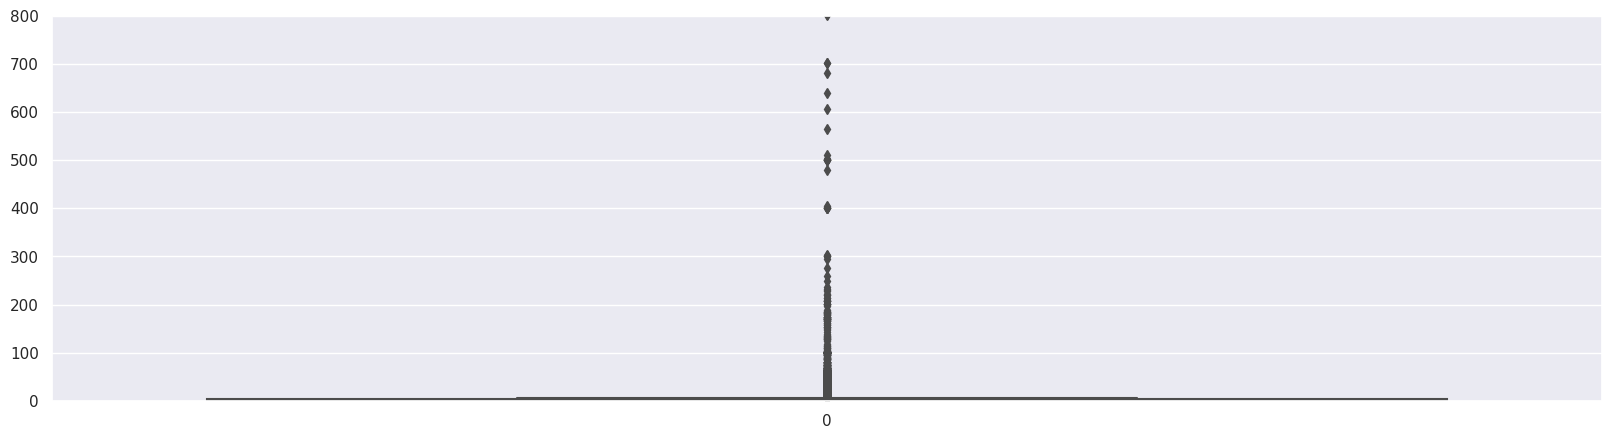

In [ ]:
plt.figure(figsize = (20,5))
sns.boxplot(df.trip_distance)
plt.ylim(0, 800)
plt.show()

There are some trips over 50 miles and some are over 0 miles.

In [ ]:
print(f"There are {df.trip_distance[df.trip_distance == 0 ].count()} trip records with 0 miles distance")

There are 79365 trip records with 0 miles distance


There are 79365 trip records with 0 miles distance.

Around 80K trip record with distance equal to 0. Below are some possible explanation for such records.

* Customer changed mind and cancelled the journey just after accepting it.

* Software didn't recorded dropoff location properly due to which dropoff location is the same as the pickup location.

* Issue with GPS tracker while the journey is being finished.

* Driver cancelled the trip just after accepting it due to some reason. So the trip couldn't start.

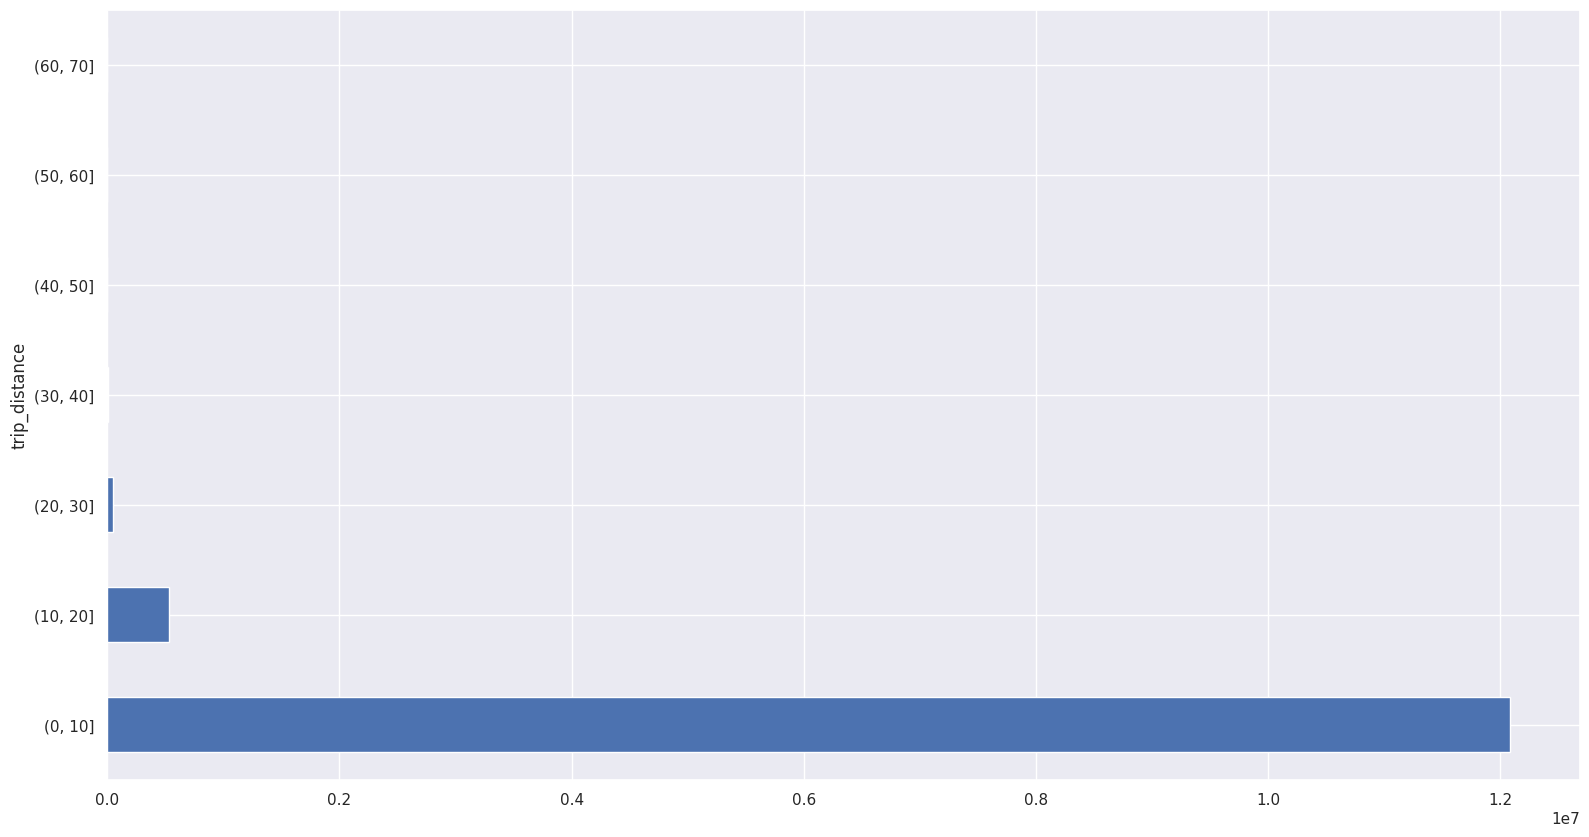

In [ ]:
df.trip_distance.groupby(pd.cut(df.trip_distance, np.arange(0,80,10))).count().plot(kind='barh',figsize = (19,10))
plt.show()

It is clear from the aforementioned observation that the majority of rides are completed in the range of one to ten miles, with some spanning up to thirty miles. Because fewer trips are made on other slabs than these, the other slabs' bars are not visible.


In [ ]:
df_short = df[df.trip_distance <= 30].shape[0]
df_long = df[df.trip_distance > 30].shape[0]

print(f"Short Trips: {df_short} records in total.")
print(f"Long Trips: {df_long} records in total.")


Short Trips: 12745596 records in total.
Long Trips: 3390 records in total.


Distance per Vendor

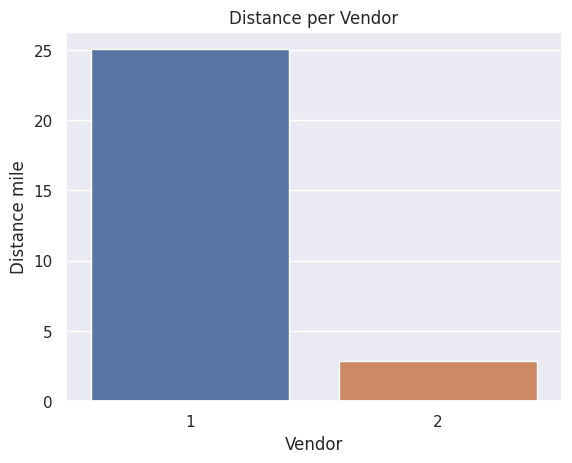

In [ ]:
group8 = df.groupby('VendorID').trip_distance.mean()
sns.barplot(x=group8.index, y=group8.values)
plt.ylabel("Distance mile")
plt.xlabel("Vendor")
plt.title('Distance per Vendor')
plt.show()

Vendor 1 is the winner. Vendor 1's average trip duration is longer than Vendor 1's.


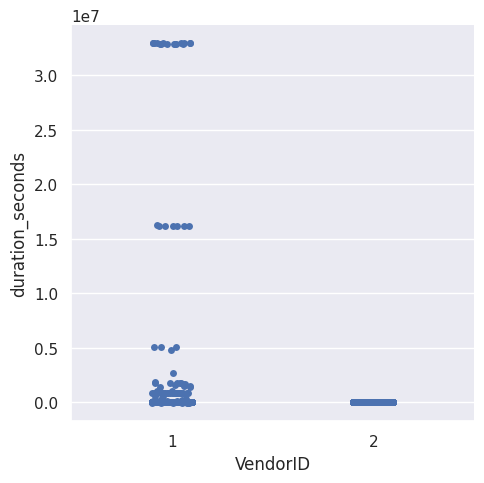

In [ ]:
sns.catplot(x="VendorID", y="duration_seconds",kind="strip",data=df)

Here, we can observe that while vendor 1 offers taxis for both short and long trips, vendor 2 primarily offers taxis for short trips.

Distance v/s Trip duration

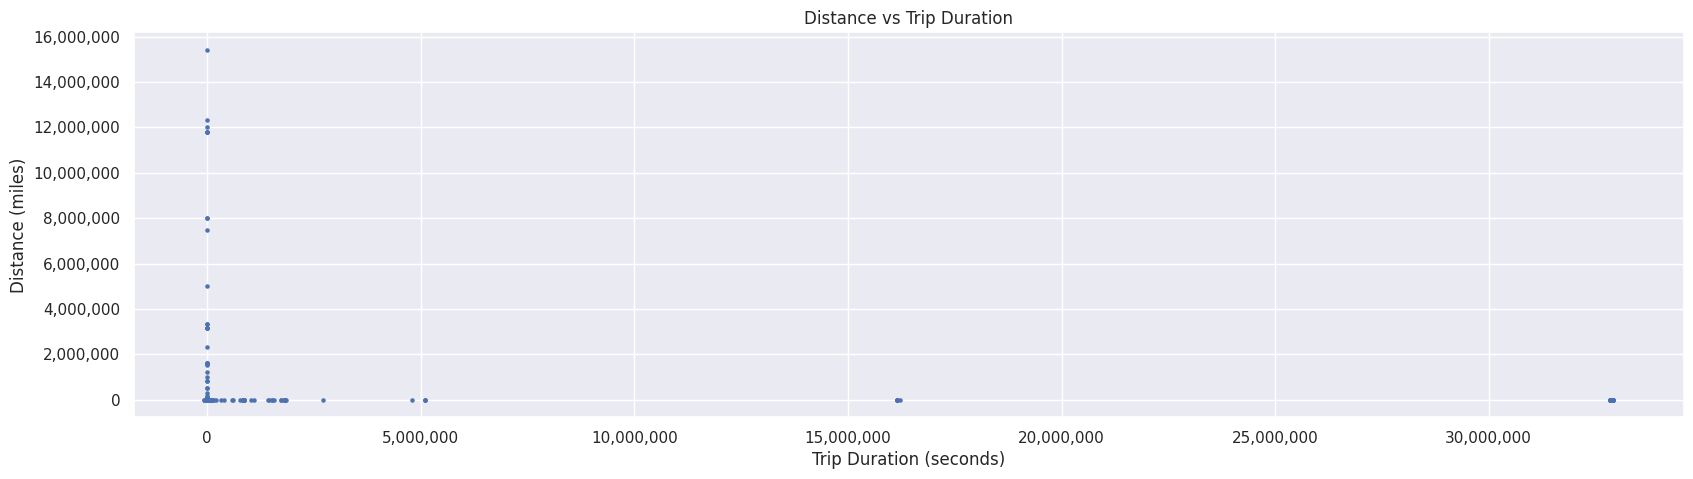

In [ ]:
plt.figure(figsize=(20, 5))
plt.scatter(df.duration_seconds, df.trip_distance, s=5, alpha=1)
plt.ylabel('Distance (miles)')
plt.xlabel('Trip Duration (seconds)')
plt.title('Distance vs Trip Duration')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
plt.show()

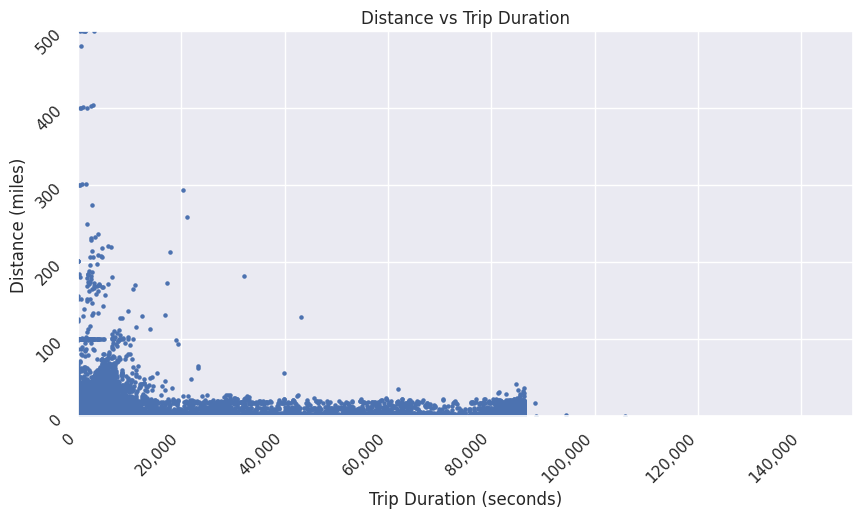

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(df.duration_seconds, df.trip_distance, s=5, alpha=1)
plt.ylabel('Distance (miles)')
plt.xlabel('Trip Duration (seconds)')
plt.title('Distance vs Trip Duration')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45, ha="right")
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
plt.xlim(0, 150000)
plt.ylim(0,500)

plt.show()


Most of the trips took about 90000 seconds which is 25 hours, which could be travelling from one state to another in cab.

Let's focus on the graph area where distance is < 30 mile and duration is < 1000 seconds.

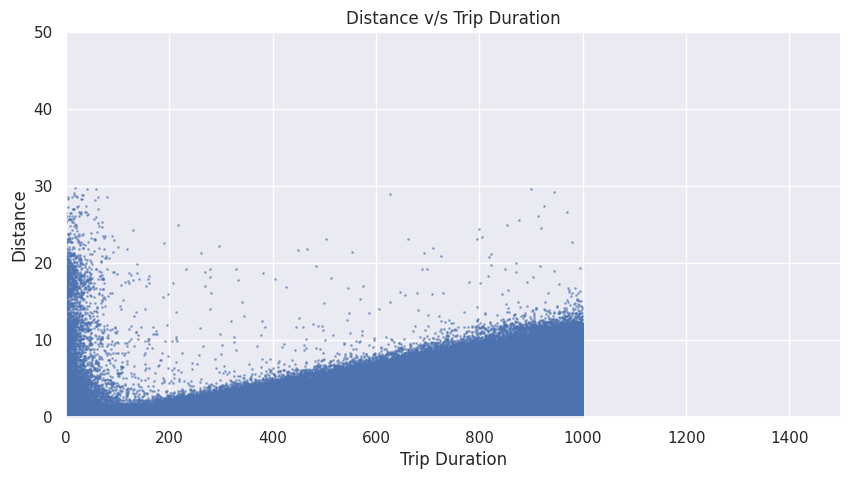

In [ ]:
plt.figure(figsize = (10,5))
dur_dist = df.loc[(df.trip_distance < 30) & (df.duration_seconds < 1000), ['trip_distance','duration_seconds']]
plt.scatter(dur_dist.duration_seconds, dur_dist.trip_distance , s=1, alpha=0.5)
plt.ylabel('Distance')
plt.xlabel('Trip Duration')
plt.title('Distance v/s Trip Duration')
plt.xlim(0, 1500)
plt.ylim(0,50)
plt.show()

There should have been a linear relationship between the distance covered and trip duration on an average but we can see dense collection of the trips in the lower right corner which showcase many trips with the inconsistent readings.
We should remove those trips which covered 0 mile distance but clocked more than 1 minute to make our data more consistent for predictive model. Because if the trip was cancelled after booking, than that should not have taken more than a minute time. This is our assumption.

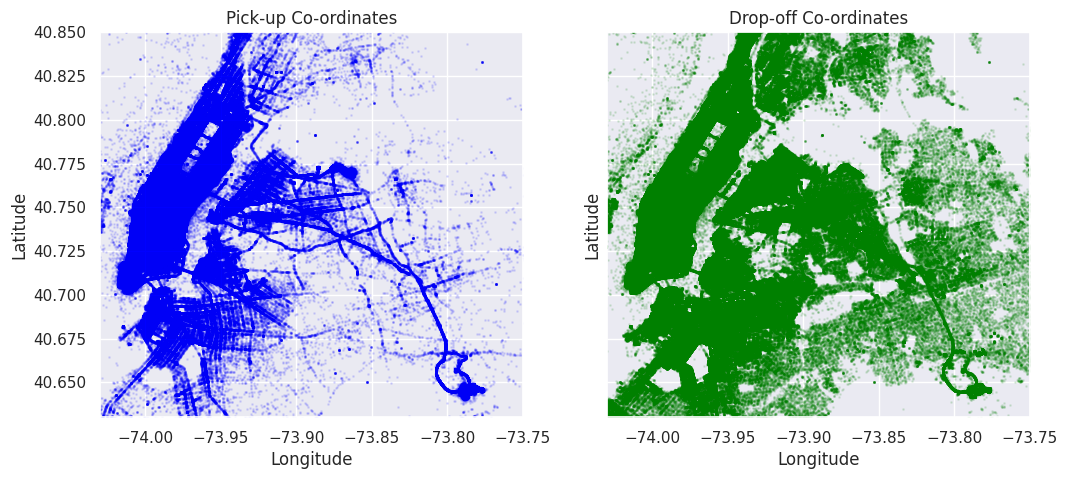

In [ ]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,figsize = (12,5))
ax[0].scatter(df['pickup_longitude'].values, df['pickup_latitude'].values,
color='blue', s=1, label='train', alpha=0.1)
ax[1].scatter(df['dropoff_longitude'].values, df['dropoff_latitude'].values,
color='green', s=1, label='train', alpha=0.1)
ax[1].set_title('Drop-off Co-ordinates')
ax[0].set_title('Pick-up Co-ordinates')
ax[0].set_ylabel('Latitude')
ax[0].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

In [18]:
import folium
pickup_map = folium.Map(location=[df['pickup_latitude'].mean(), df['pickup_longitude'].mean()], zoom_start=12)
for index, row in df.sample(1000).iterrows():  # Sample 1000 data points for better visualization
    folium.CircleMarker(location=[row['pickup_latitude'], row['pickup_longitude']], radius=3, color='blue').add_to(pickup_map)
pickup_map

In [19]:
pickup_map = folium.Map(location=[df['dropoff_latitude'].mean(), df['dropoff_longitude'].mean()], zoom_start=12)
for index, row in df.sample(1000).iterrows():  # Sample 1000 data points for better visualization
    folium.CircleMarker(location=[row['dropoff_latitude'], row['dropoff_longitude']], radius=3, color='blue').add_to(pickup_map)
pickup_map

The Pickup plot indicates that the majority of the spread is centered in the Manhattan region.
For a pickup location, Manhattan is fairly populated, we can say.
In contrast to the pickup zone, the drop zone is fairly dispersed.
The average distance, as determined by distance analysis, is 2.1 miles, which helps to explain why Manhattan has experienced a significant intensity drop.


# Feature Creation and Transformation

In [12]:
df['Pickup_Datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['Dropoff_Datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [13]:
df['pickup_hour'] = df['Pickup_Datetime'].dt.hour
df['pickup_day'] = df['Pickup_Datetime'].dt.day
df['pickup_month'] = df['Pickup_Datetime'].dt.month
df['pickup_day_of_week'] = df['Pickup_Datetime'].dt.dayofweek

In [14]:
df['dropoff_hour'] = df['Dropoff_Datetime'].dt.hour
df['dropoff_day'] = df['Dropoff_Datetime'].dt.day
df['dropoff_month'] = df['Dropoff_Datetime'].dt.month
df['dropoff_day_of_week'] = df['Dropoff_Datetime'].dt.dayofweek

In [15]:
df['trip_duration_minutes'] = (df['Dropoff_Datetime'] - df['Pickup_Datetime']).dt.total_seconds() / 60
# Drop the Pickup_Datetime and Dropoff_Datetime columns
df.drop(['Pickup_Datetime', 'Dropoff_Datetime'], axis=1, inplace=True)

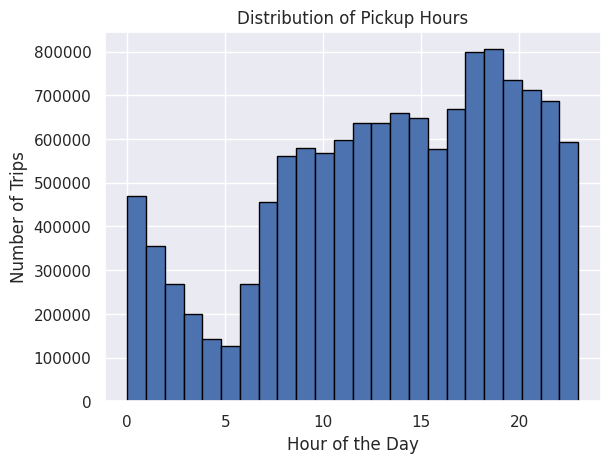

In [16]:
import matplotlib.pyplot as plt

plt.hist(df['pickup_hour'], bins=24, edgecolor='black')
plt.title('Distribution of Pickup Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

# Conclusion

1. Trip durations range widely, from a few seconds to over 25 hours.

2. Most trips were taken on Saturday and the least amount of trips were taken on Monday

3. Vendor 1 mostly provides the longer trips

4. Evenings are when most pickups and drops happen. whereas the morning and late night hours see the fewest drops and pickups.

5. Its evident that most customers prefer cash pay and small part of customers prefer online payment

6. There are 79365 trip records with 0 miles distance.
Which could be technical issues or cancellation.

7. Most pickups and dropoffs happened at ManHattan area.

8. Most short trips took about 20 minutes
